In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
from matplotlib import colormaps
import numpy as np
from sklearn.pipeline import Pipeline
import random

In [2]:
training_file = "wildfires_training.csv"
test_file = "wildfires_test.csv"

df = pd.read_csv("wildfires_training.csv")
df_test = pd.read_csv("wildfires_test.csv")

dependent_variable = "fire"
independent_variables = [col for col in df.columns if col != dependent_variable]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fire           154 non-null    object 
 1   year           154 non-null    int64  
 2   temp           154 non-null    int64  
 3   humidity       154 non-null    int64  
 4   rainfall       154 non-null    float64
 5   drought_code   154 non-null    float64
 6   buildup_index  154 non-null    float64
 7   day            154 non-null    int64  
 8   month          154 non-null    int64  
 9   wind_speed     154 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 12.2+ KB


In [4]:
df.describe()

,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,2012.058442,31.545455,63.071429,0.855844,48.146299,16.285065,15.077922,7.603896,16.383117
std,3.355294,3.952481,16.038804,2.246798,47.348331,14.346991,8.085760,1.217620,3.218001
min,2007.000000,22.000000,21.000000,0.000000,7.180000,1.320000,1.000000,6.000000,6.000000
25%,2009.000000,29.000000,52.000000,0.000000,9.720000,5.797500,9.000000,6.000000,14.000000
50%,2012.000000,31.000000,64.000000,0.000000,31.330000,11.450000,15.000000,8.000000,16.000000
75%,2015.000000,34.000000,77.000000,0.600000,65.257500,22.775000,21.000000,9.000000,18.750000
max,2017.000000,43.000000,92.000000,16.800000,221.350000,67.720000,31.000000,9.000000,30.000000


In [5]:
df.shape

(154, 10)

In [6]:
# Training predictors and response variables
X_training = df[independent_variables]
y_training = df[dependent_variable]
y_training = LabelEncoder().fit_transform(y_training)

In [16]:
X_test = df_test[independent_variables]
y_test = df_test[dependent_variable]
y_test = LabelEncoder().fit_transform(y_test)

,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
0,2015,33,68,4.5,9.12,5.09,19,6,16
1,2009,28,56,0.0,38.17,21.21,12,6,18
2,2017,30,64,0.6,15.38,6.24,24,9,19
3,2007,23,74,8.3,7.36,2.27,14,9,28
4,2017,31,72,0.3,30.47,5.63,7,9,17
5,2013,30,73,0.1,16.28,3.58,4,9,18
6,2015,34,66,0.0,210.55,62.99,28,8,16
7,2013,36,67,0.0,131.20,34.92,20,8,19
8,2012,34,74,0.0,18.95,8.94,11,7,15
9,2015,32,70,1.4,10.05,8.31,9,7,16


In [8]:
# Time to re-run with Hyper-parameter tuning
penalties = ["l1", "l2", "elasticnet", None]
c_values = np.logspace(-3, 3, 10)

In [9]:
training_test_comparison = {}

for penalty in penalties:
    models_info = []
    for c in c_values:
        l1_ratio = 0.5 if penalty == "elasticnet" else None

        if penalty == "l1":
            solver = "liblinear"
        elif penalty == "elasticnet":
            solver = "saga"
            l1_ratio = 0.5
        else:
            solver = "lbfgs"

        logreg_pipe = Pipeline(
            [
                ("scaler", StandardScaler()),
                (
                    "logreg",
                    LogisticRegression(
                        random_state=42,
                        penalty=penalty,
                        solver=solver,
                        max_iter=5000,
                        C=c if penalty is not None else 1.0,
                        l1_ratio=l1_ratio,
                    ),
                ),
            ]
        )


        logreg_pipe.fit(X_training, y_training)
        predictions_training = logreg_pipe.predict(X_training)
        predictions_test = logreg_pipe.predict(X_test)

        accuracy_training = metrics.accuracy_score(y_training, predictions_training)
        accuracy_test = metrics.accuracy_score(y_test, predictions_test)

        models_info.append({
            "C": c,
            "training_accuracy": accuracy_training,
            "test_accuracy": accuracy_test,
            "coefficients": logreg_pipe.named_steps["logreg"].coef_,
            "intercept": logreg_pipe.named_steps["logreg"].intercept_,
            "pipeline": logreg_pipe,
            "predictions_test": predictions_test,
        })

    # Save all models for this penalty
    training_test_comparison[penalty] = models_info

In [10]:
# Print nicely
for pen in penalties:
    best_model = max(training_test_comparison[pen], key=lambda x: x["test_accuracy"])
    print(f"Best {pen} model:")
    print(f"  C = {best_model['C']}")
    print(f"  Training Accuracy = {best_model['training_accuracy']:.4f}")
    print(f"  Test Accuracy = {best_model['test_accuracy']:.4f}")
    print(f"  Coefficients = {best_model['coefficients']}")
    print(f"  Intercept = {best_model['intercept']}\n")

Best l1 model:
  C = 1000.0
  Training Accuracy = 0.9221
  Test Accuracy = 0.9000
  Coefficients = [[  0.46406567   0.86430437  -1.9958336  -58.75765084   2.58675035
    2.99425961  -0.66610867   0.28716665   0.44217141]]
  Intercept = [-18.49705812]

Best l2 model:
  C = 46.41588833612773
  Training Accuracy = 0.9221
  Test Accuracy = 0.8800
  Coefficients = [[  0.17640258   0.34154311  -0.75948325 -16.60841341  -0.92118426
    4.01934501  -0.46455465   0.23707547   0.09454268]]
  Intercept = [-4.42314875]

Best elasticnet model:
  C = 10.0
  Training Accuracy = 0.9221
  Test Accuracy = 0.8800
  Coefficients = [[ 1.17443146e-01  2.19911689e-01 -6.69368495e-01 -1.04044634e+01
  -1.14581267e+00  3.91625443e+00 -4.90255181e-01  2.20088585e-01
   1.44599863e-03]]
  Intercept = [-2.39512566]

Best None model:
  C = 0.001
  Training Accuracy = 0.9286
  Test Accuracy = 0.9000
  Coefficients = [[  0.47790954   0.88484919  -2.05849356 -60.66680747   2.73215791
    2.99100929  -0.682745     0.2

## Comparison Graphs
Below are graphs showing the effect of penalty functions and C Values (Lambda Inverse) on Logistic Regression

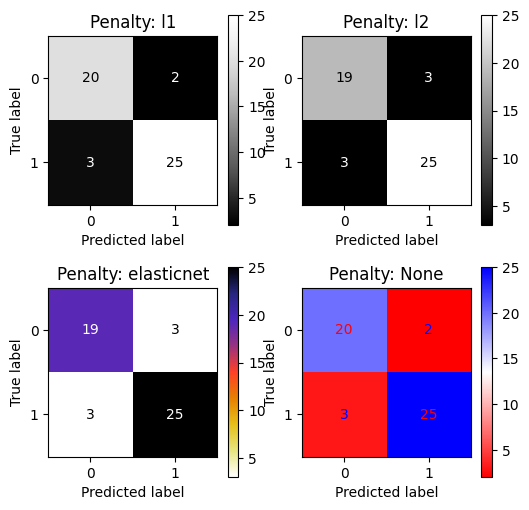

In [11]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6,6))
ax = ax.flatten()

for i, pen in enumerate(["l1", "l2", "elasticnet", None]):
    best_model = max(training_test_comparison[pen], key=lambda x: x["test_accuracy"])


    cm = confusion_matrix(y_test, best_model["predictions_test"])
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=logreg_pipe.classes_
    )

    disp.plot(cmap=random.choice(list(colormaps)),ax=ax[i])
    disp.ax_.set_title(f"Penalty: {pen}")

In [19]:
np.arange(50, 250, 25)

array([ 50,  75, 100, 125, 150, 175, 200, 225])